<a href="https://colab.research.google.com/github/tgarcia14/DigitalBuilders/blob/main/learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science 4330
Team name Digital Builders
by .edu Kevin Minzenmayer and YaeEun Yi

1.   Tony Garcia - tgarcia14@angelo.edu
2.   Kevin Minzenmayer - kminzenmayer@angelo.edu
3.   YaeEun Yi - yyi@angelo.edu

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from mlxtend.plotting import plot_decision_regions
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import scipy.stats as stats
import statsmodels as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from mpl_toolkits import mplot3d
import statsmodels.api as sm
from sklearn.feature_selection import r_regression
from sklearn.utils import resample
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import metrics
from sklearn.metrics import f1_score
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

This data source comes from data.gov with a direct link [Here]( https://catalog.data.gov/dataset/data-breach-notifications-affecting-washington-residents)

This data shows security incidents that have happened in the state of washinton, what was the cause, and how many were affected by the incidents.



In [ ]:
import requests
url = 'https://data.wa.gov/api/views/sb4j-ca4h/rows.json?accessType=DOWNLOAD'
response = requests.get(url)
data = response.json()
records = data['data']
column_names = [column['name'] for column in data['meta']['view']['columns']]
data_breach_df = pd.DataFrame(records, columns=column_names)

In [ ]:
# Copy the DataFrame to avoid modifying the original
cleaned_df = data_breach_df.copy()

# Remove unnecessary columns (if any)
# Example: Drop columns like 'ID' or any irrelevant text-heavy fields
cleaned_df = cleaned_df.drop(['DateEnd'], axis=1)
cleaned_df = cleaned_df.drop(['Id'], axis=1)
cleaned_df = cleaned_df.drop(['EntityState'], axis=1)
# Handle missing values
# Here, missing data with impute data
cleaned_df['CyberattackType'] = cleaned_df['CyberattackType'].fillna('Other')
cleaned_df['BusinessType'] = cleaned_df['BusinessType'].fillna('Other')
cleaned_df['DataBreachCause'] = cleaned_df['DataBreachCause'].fillna('Unknown/unclear')

# Convert data types if needed
# Convert 'DateAware' and 'DateSubmitted' columns to datetime objects for analysis
cleaned_df['DateAware'] = pd.to_datetime(cleaned_df['DateAware'])
cleaned_df['DateSubmitted'] = pd.to_datetime(cleaned_df['DateSubmitted'])

# Standardize string values (if needed)
# Example: Convert all string data to lowercase for consistency
for column in cleaned_df.select_dtypes(include=['object']):
    cleaned_df[column] = cleaned_df[column].str.lower()

#Converts WashingtonAffected to an INT
cleaned_df['WashingtoniansAffected'] = cleaned_df['WashingtoniansAffected'].fillna(0).astype(int)
cleaned_df['WashingtoniansAffected'] = cleaned_df['WashingtoniansAffected'].astype(int)
# Remove duplicates
cleaned_df = cleaned_df.drop_duplicates()

# Check for inconsistencies or outliers in numeric columns
# Example: Check for outliers in 'WashingtoniansAffected' and 'DaysToContainBreach'
print(cleaned_df['WashingtoniansAffected'].describe())
print(cleaned_df['DaysToContainBreach'].describe())

# Optional: Handle specific outliers or inconsistencies
# Example: Remove extreme outliers based on domain knowledge
# cleaned_df = cleaned_df[cleaned_df['WashingtoniansAffected'] < threshold_value]
# Mean imputation for 'DaysToContainBreach' column
####
cleaned_df['DaysToContainBreach'] = pd.to_numeric(cleaned_df['DaysToContainBreach'], errors='coerce')
cleaned_df['DaysToContainBreach'] = cleaned_df['DaysToContainBreach'].fillna(cleaned_df['DaysToContainBreach'].mean()).astype(int)

#Mean imputation for  Days to Identify and conversion to Int
####
cleaned_df.loc[:, 'DaysToIdentifyBreach'] = pd.to_numeric(cleaned_df['DaysToIdentifyBreach'], errors='coerce')
cleaned_df['DaysToIdentifyBreach'] = cleaned_df['DaysToIdentifyBreach'].fillna(cleaned_df['DaysToIdentifyBreach'].mean()).astype(int)
# Mean imputations for Days of exposure and conversion to Int
cleaned_df.loc[:, 'DaysOfExposure'] = pd.to_numeric(cleaned_df['DaysOfExposure'], errors='coerce')
cleaned_df['DaysOfExposure'] = cleaned_df['DaysOfExposure'].fillna(cleaned_df['DaysOfExposure'].mean()).astype(int)

#Mean imputation for DaysBreachLifecycle and conversion to Int
cleaned_df.loc[:, 'DaysBreachLifecycle'] = pd.to_numeric(cleaned_df['DaysBreachLifecycle'], errors='coerce')
cleaned_df['DaysBreachLifecycle'] = cleaned_df['DaysBreachLifecycle'].fillna(cleaned_df['DaysBreachLifecycle'].mean()).astype(int)

#DaysElapsedBetweenEndAndDiscovery
cleaned_df.loc[:, 'DaysElapsedBetweenEndAndDiscovery'] = pd.to_numeric(cleaned_df['DaysElapsedBetweenEndAndDiscovery'], errors='coerce')
cleaned_df['DaysElapsedBetweenEndAndDiscovery'] = cleaned_df['DaysElapsedBetweenEndAndDiscovery'].fillna(cleaned_df['DaysElapsedBetweenEndAndDiscovery'].mean()).astype(int)

#DaysElapsedBeforeNotification
cleaned_df.loc[:, 'DaysElapsedBeforeNotification'] = pd.to_numeric(cleaned_df['DaysElapsedBeforeNotification'], errors='coerce')
cleaned_df['DaysElapsedBeforeNotification'] = cleaned_df['DaysElapsedBeforeNotification'].fillna(cleaned_df['DaysElapsedBeforeNotification'].mean()).astype(int)


cleaned_df.drop('sid', axis=1, inplace=True)
cleaned_df.drop('id', axis=1, inplace=True)
cleaned_df.drop('position', axis=1, inplace=True)
cleaned_df.drop('created_at', axis=1, inplace=True)
cleaned_df.drop('created_meta', axis=1, inplace=True)
cleaned_df.drop('updated_at', axis=1, inplace=True)
cleaned_df.drop('updated_meta', axis=1, inplace=True)
cleaned_df.drop('meta', axis=1, inplace=True)

cleaned_df['DateStart'] = pd.to_datetime(cleaned_df['DateStart'])

cleaned_df['Year'] = cleaned_df['Year'].astype(int)
cleaned_df['YearText'] = cleaned_df['YearText'].astype(int)
# Show the first few rows of the cleaned dataset

count    1.213000e+03
mean     3.035297e+04
std      1.783883e+05
min      0.000000e+00
25%      8.100000e+02
50%      1.687000e+03
75%      6.586000e+03
max      3.243664e+06
Name: WashingtoniansAffected, dtype: float64
count     982
unique     62
top         0
freq      771
Name: DaysToContainBreach, dtype: object


<ipython-input-4-41454052aa62>:47: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cleaned_df['DaysToIdentifyBreach'] = cleaned_df['DaysToIdentifyBreach'].fillna(cleaned_df['DaysToIdentifyBreach'].mean()).astype(int)
<ipython-input-4-41454052aa62>:50: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cleaned_df['DaysOfExposure'] = cleaned_df['DaysOfExposure'].fillna(cleaned_df['DaysOfExposure'].mean()).astype(int)
<ipython-input-4-41454052aa62>:54: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a futu

In [ ]:
cleaned_df[['DaysToContainBreach','DaysToIdentifyBreach','DaysBreachLifecycle','DaysOfExposure','DaysElapsedBetweenEndAndDiscovery','DaysElapsedBeforeNotification']]

,DaysToContainBreach,DaysToIdentifyBreach,DaysBreachLifecycle,DaysOfExposure,DaysElapsedBetweenEndAndDiscovery,DaysElapsedBeforeNotification
0,4,0,4,4,72,41
1,5,118,123,93,72,453
2,0,60,60,5,55,23
3,5,0,123,93,72,298
4,0,6,6,6,72,60
...,...,...,...,...,...,...
1208,0,4,4,3,1,164
1209,0,16,16,2,14,55
1210,0,9,9,9,72,164
1211,0,0,0,0,72,161


a sample is drawn from the dataset since all the data wont fit in the plots

In [ ]:
sample_df = cleaned_df.sample(n=150, random_state=1)

In [ ]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 1122 to 915
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   DateAware                          148 non-null    datetime64[ns]
 1   DateSubmitted                      150 non-null    datetime64[ns]
 2   DataBreachCause                    150 non-null    object        
 3   DateStart                          135 non-null    datetime64[ns]
 4   Name                               150 non-null    object        
 5   CyberattackType                    150 non-null    object        
 6   WashingtoniansAffected             150 non-null    int64         
 7   IndustryType                       150 non-null    object        
 8   BusinessType                       150 non-null    object        
 9   Year                               150 non-null    int64         
 10  YearText                           150 n

# Supervised Learning

# **Supervise Introduction**

In this model I use KNN to to predict the cause of the breach(Cyberattack,theft,unauthorized acess) using various features and even engineer some fetures from the data features I used where 'DaysToContainBreach','DaysToIdentifyBreach', 'DaysOfExposure','WashingtoniansAffected','AffectedDuration', 'BusinessType','internlOrexternal.' In addition I used SMOTE to help oversample theft and unautorized acess as they appeared alot less than cuberattack in the dataset

In [ ]:
cleaned_df['DataBreachDuration'] = cleaned_df['DaysBreachLifecycle'] - cleaned_df['DaysToIdentifyBreach']
cleaned_df['BreachStartMonth'] = cleaned_df['DateStart'].dt.month
cleaned_df['BreachStartQuarter'] = cleaned_df['DateStart'].dt.quarter
cleaned_df['BreachStartYear'] = cleaned_df['DateStart'].dt.year
business_type_mapping = {
        'hospital': 'healthcare',
        'clinic': 'healthcare',
        'bank': 'finance',
        'credit union': 'finance',

    }
cleaned_df['BusinessTypeCategory'] = cleaned_df['BusinessType'].map(business_type_mapping)
data_breach_cause_mapping = {
        'hacking': 'external',
        'phishing': 'external',
        'malware': 'external',
        'employee error': 'internal',
        # ... add more mappings
    }
cleaned_df['DataBreachCauseCategory'] = cleaned_df['DataBreachCause'].map(data_breach_cause_mapping)
cleaned_df['AffectedDuration'] = cleaned_df['WashingtoniansAffected'] * cleaned_df['DataBreachDuration']
cleaned_df['WasLongBreach'] = (cleaned_df['DaysBreachLifecycle'] > 30).astype(int)  # Flag for breaches longer than 30 days


In [ ]:
data_breach_cause_mapping = {
    'hacking': 'external',
    'phishing': 'external',
    'malware': 'external',
    'ransomware': 'external',
    'social engineering': 'external',
    'unintentional disclosure': 'internal',
    'employee error': 'internal',
    'theft or mistake': 'internal',
    'physical loss': 'internal',
    'improper disposal': 'internal',
    'vendor error': 'internal',
    'unknown/unclear': 'unknown',
}

cleaned_df['internlOrexternal'] = cleaned_df['DataBreachCause'].map(data_breach_cause_mapping)

# Define features and target
X = cleaned_df[['DaysToContainBreach','DaysToIdentifyBreach', 'DaysOfExposure','WashingtoniansAffected','AffectedDuration', 'BusinessType','internlOrexternal']]
y = cleaned_df['DataBreachCause']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a OneHotEncoder object
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False for numpy array

# Fit the encoder on the training data and transform both training and testing data
categorical_features = ['BusinessType', 'internlOrexternal']  # Include the new category
X_train_encoded = encoder.fit_transform(X_train[categorical_features])
X_test_encoded = encoder.transform(X_test[categorical_features])

# Get feature names after one-hot encoding
encoded_feature_names = encoder.get_feature_names_out(categorical_features)

# Create DataFrames from the encoded arrays
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoded_feature_names, index=X_train.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoded_feature_names, index=X_test.index)

# Concatenate the encoded features with the numerical features
X_train = pd.concat([X_train.drop(['BusinessType', 'internlOrexternal'], axis=1), X_train_encoded_df], axis=1) # Changed here
X_test = pd.concat([X_test.drop(['BusinessType', 'internlOrexternal'], axis=1), X_test_encoded_df], axis=1) # Changed here


# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define sampling strategy for SMOTE
sampling_strategy = {
    'theft or mistake': 100,  # Oversample to 100 samples
    'unauthorized access': 50  # Oversample to 50 samples
}

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Now, train your KNN classifier on the resampled data
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train_resampled, y_train_resampled)







# Make predictions and evaluate as before
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.7119341563786008
                     precision    recall  f1-score   support

        cyberattack       0.80      0.81      0.80       176
   theft or mistake       1.00      0.95      0.97        20
unauthorized access       0.26      0.26      0.26        47

           accuracy                           0.71       243
          macro avg       0.69      0.67      0.68       243
       weighted avg       0.71      0.71      0.71       243

[[142   0  34]
 [  1  19   0]
 [ 35   0  12]]


# **Supervise Conclusion**

The model performs well for the dominant class(cyberattack) and smaller but distinguishable class (theft or mistake).Unfortunately, Performance is poor for unauthorized access.This  is likely caused by the imblaced of the dataset even after using SMOTE.


# Unsupervised Learning:

# **Unsupervise Introduction**

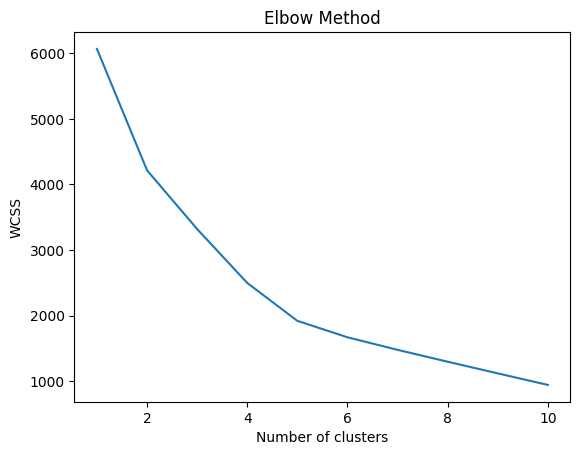

        DaysToContainBreach                                              \
                      count       mean        std  min   25%  50%   75%   
Cluster                                                                   
0                    1155.0   4.143723  17.692642  0.0  0.00  0.0   5.0   
1                      52.0  37.750000  89.514568  0.0  0.00  0.0  10.5   
2                       6.0   3.833333   2.316607  0.0  2.75  5.0   5.0   

               DaysToIdentifyBreach              ... WashingtoniansAffected  \
           max                count        mean  ...                    75%   
Cluster                                          ...                          
0        365.0               1155.0   82.932468  ...                6476.50   
1        366.0                 52.0  920.807692  ...                4601.25   
2          6.0                  6.0   57.500000  ...             2845368.00   

                   DaysBreachLifecycle                                    

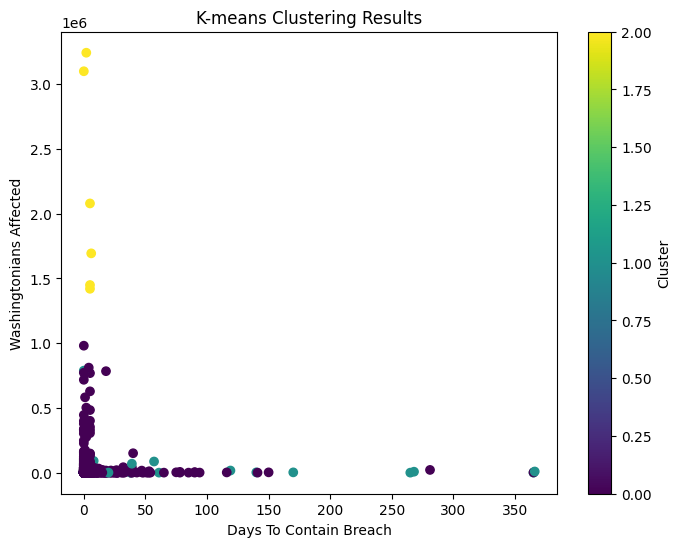

In [ ]:

features_for_clustering = ['DaysToContainBreach', 'DaysToIdentifyBreach', 'DaysOfExposure', 'WashingtoniansAffected', 'DaysBreachLifecycle']
X_cluster = cleaned_df[features_for_clustering]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# Determine optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


# Apply K-means clustering with the chosen number of clusters (e.g., 3 based on the Elbow method)
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
cleaned_df['Cluster'] = kmeans.fit_predict(X_scaled)

# Analyze the clusters (example: group by cluster and get descriptive statistics)
cluster_analysis = cleaned_df.groupby('Cluster')[features_for_clustering].describe()
print(cluster_analysis)

# Visualization (example: scatter plot of two features colored by cluster)
plt.figure(figsize=(8, 6))
plt.scatter(cleaned_df['DaysToContainBreach'], cleaned_df['WashingtoniansAffected'], c=cleaned_df['Cluster'], cmap='viridis')
plt.xlabel('Days To Contain Breach')
plt.ylabel('Washingtonians Affected')
plt.title('K-means Clustering Results')
plt.colorbar(label='Cluster')
plt.show()

# **Unsupervise Conclusion**